In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import re

In [88]:
# Function to clean column names
def clean_column_name(name):
    # Convert to lowercase
    name = name.lower()
    # Replace spaces with underscores
    name = name.replace(' ', '_')
    # Remove special characters (except underscores)
    name = re.sub(r'[^\w\s]', '', name)
    return name

# Apply the function to each column name
#df.columns = [clean_column_name(col) for col in df.columns]

In [89]:
# Read the CSV file
file_path = 'C:\\Users\\rjsri\\BankTest\\Approach2.xls'  # Replace with your file path
df = pd.read_excel(file_path, dtype= str)

df.columns = [clean_column_name(col) for col in df.columns]
# Create a list to hold new rows
new_rows = []
# List of columns where you want to append '@'
columns_to_append = ['acknowledgement_no','transaction_id', 'from_account_no', 'to_account_no', 'utr_number']

# Prepend '@' to every value in the specified columns
for column in columns_to_append:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: '`' + str(x) if pd.notnull(x) else x)

# Function to process columns and split rows
def process_column(df, column_name):
    new_rows = []
    for index, row in df.iterrows():
         # Ensure the column values are strings
        value = str(row[column_name])
        # Split the values in the column based on spaces and strip any extra spaces
        values = [val.strip() for val in row[column_name].split() if val.strip()]
        
        # If there's more than one value, create a new row for each value
        if len(values) > 1:
            for value in values:
                new_row = row.copy()  # Copy the original row
                new_row[column_name] = value  # Update with the trimmed text
                new_rows.append(new_row)
        else:
            # Keep the original row if there's only one value (no split needed)
            new_rows.append(row)
    return pd.DataFrame(new_rows)

# List of columns to process
columns_to_process = ['transaction_id', 'from_account_no', 'to_account_no']

# Ensure columns are in string format
for col in columns_to_process:
    if col in df.columns:
        df[col] = df[col].astype(str)
        
# Process each column and merge results
processed_dfs = [process_column(df, col) for col in columns_to_process]
# Merge all processed DataFrames
final_df = pd.concat(processed_dfs, ignore_index=True)

# Display the updated DataFrame to verify
print(final_df.head())

# Save the modified DataFrame to a new CSV file if needed
final_df.to_csv('C:\\Users\\rjsri\\BankTest\\Approach2_Cleaned.csv', index=False)
df = final_df

  s_no acknowledgement_no      transaction_id layer    from_account_no  \
0    1    `30202240003825       `403720656342     1    ` -:31902364872   
1    2    `30202240003825       `404013715189     1    ` -:31902364872   
2    3    `30202240003825       `404414884407     1    ` -:20180721107   
3    4    `30202240003825  `52024021473836704     1  ` -:0619101026107   
4    5    `30202240003825  `52024021473837296     1  ` -:0619101026107   

  action_taken_by_bank_wallet_pgpa_merchant_insurance  \
0                                  Money Transfer to    
1                                  Money Transfer to    
2                                  Money Transfer to    
3                                  Money Transfer to    
4                                  Money Transfer to    

  bank_wallet_pgpa_merchant__insurance  \
0                              AU Bank   
1                        IndusInd Bank   
2                        IndusInd Bank   
3       Ujjivan Small Finance Bank Ltd   
4 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   s_no                                                 2627 non-null   object 
 1   acknowledgement_no                                   2627 non-null   object 
 2   transaction_id                                       2627 non-null   object 
 3   layer                                                2627 non-null   object 
 4   from_account_no                                      2627 non-null   object 
 5   action_taken_by_bank_wallet_pgpa_merchant_insurance  2627 non-null   object 
 6   bank_wallet_pgpa_merchant__insurance                 2627 non-null   object 
 7   to_account_no                                        2627 non-null   object 
 8   ifsc_code                                            1375 non-null  

In [91]:
df = df.drop(['unique_id'],axis=1)
df = df.drop(['s_no'],axis=1)
# Remove text within square brackets
df['to_account_no'] = df['to_account_no'].str.replace(r'\s*\[.*?\]', '', regex=True)

In [92]:
# Define the columns to clean
columns_to_clean = [
    'acknowledgement_no', 'transaction_id', 'layer',
    'from_account_no', 'utr_number', 'amount','to_account_no'
]

# Function to clean data in a column
def clean_column_data(series):
    # Remove special characters and trim spaces
    series = series.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).strip() if pd.notna(x) else x)
    return series

# Apply the cleaning function to each specified column
for col in columns_to_clean:
    if col in df.columns:
        df[col] = clean_column_data(df[col])

# Display the cleaned data to verify
print(df[columns_to_clean].head())

  acknowledgement_no     transaction_id layer from_account_no  \
0     30202240003825       403720656342     1     31902364872   
1     30202240003825       404013715189     1     31902364872   
2     30202240003825       404414884407     1     20180721107   
3     30202240003825  52024021473836704     1   0619101026107   
4     30202240003825  52024021473837296     1   0619101026107   

               utr_number   amount     to_account_no  
0            403720656342   500000  2402246256321236  
1            404013715189   100000      257041314257  
2            404414884407   126957      201028686577  
3  CNRBR52024021473836710   800000  2285120260000390  
4  CNRBR52024021473837342  1000000      259209548592  


In [93]:
df['unique_id'] = pd.Series(range(1, len(df) + 1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   acknowledgement_no                                   2627 non-null   object
 1   transaction_id                                       2627 non-null   object
 2   layer                                                2627 non-null   object
 3   from_account_no                                      2627 non-null   object
 4   action_taken_by_bank_wallet_pgpa_merchant_insurance  2627 non-null   object
 5   bank_wallet_pgpa_merchant__insurance                 2627 non-null   object
 6   to_account_no                                        2627 non-null   object
 7   ifsc_code                                            1375 non-null   object
 8   cheque_no                                            2627 non-null   object
 9

In [94]:
df['layer'] = pd.to_numeric(df['layer'], errors='coerce')
print(df['layer'].unique())
df.info()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   acknowledgement_no                                   2627 non-null   object
 1   transaction_id                                       2627 non-null   object
 2   layer                                                2627 non-null   int64 
 3   from_account_no                                      2627 non-null   object
 4   action_taken_by_bank_wallet_pgpa_merchant_insurance  2627 non-null   object
 5   bank_wallet_pgpa_merchant__insurance                 2627 non-null   object
 6   to_account_no                                        2627 non-null   object
 7   ifsc_code                                            1375 non-null   object
 8   cheque_no                   

In [95]:
layers = df.groupby('layer')
layer1 = layers.get_group(1)
layer1

,acknowledgement_no,transaction_id,layer,from_account_no,action_taken_by_bank_wallet_pgpa_merchant_insurance,bank_wallet_pgpa_merchant__insurance,to_account_no,ifsc_code,cheque_no,mid,...,action_taken_name,action_taken_by_email,branch_location,branch_manager_name__contact_details,unnamed_25,unnamed_26,unnamed_27,unnamed_28,unnamed_29,unique_id
0,30202240003825,403720656342,1,31902364872,Money Transfer to,AU Bank,2402246256321236,AUBL0002462,0,NaN,...,M N S CHITRA,manyam.srichitra@sbi.co.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,30202240003825,404013715189,1,31902364872,Money Transfer to,IndusInd Bank,257041314257,INDB0000237,0,NaN,...,M N S CHITRA,manyam.srichitra@sbi.co.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,30202240003825,404414884407,1,20180721107,Money Transfer to,IndusInd Bank,201028686577,INDB0000001,0,NaN,...,M N S CHITRA,manyam.srichitra@sbi.co.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,30202240003825,52024021473836704,1,0619101026107,Money Transfer to,Ujjivan Small Finance Bank Ltd,2285120260000390,NaN,0,NaN,...,Cyber Police Coordinating Cell,blrccp@canarabank.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,30202240003825,52024021473837296,1,0619101026107,Money Transfer to,IndusInd Bank,259209548592,NaN,0,NaN,...,Cyber Police Coordinating Cell,blrccp@canarabank.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,30202240003825,403914188328,1,8273010000009744,Money Transfer to,IndusInd Bank,1,NaN,0,NaN,...,Avish Dhiliwal,avishdhiliwal@dbs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507
2507,30202240003825,403914188328,1,8273010000009744,Money Transfer to,IndusInd Bank,times,NaN,0,NaN,...,Avish Dhiliwal,avishdhiliwal@dbs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2508
2508,30202240003825,403914188328,1,8273010000009744,Money Transfer to,IndusInd Bank,,NaN,0,NaN,...,Avish Dhiliwal,avishdhiliwal@dbs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2509
2509,30202240003825,404012201111,1,201028776959,Other,IndusInd Bank,nan,NaN,0,NaN,...,NEHA SHARMA,neha.sharma@indusind.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2510


In [96]:
layer1['from_account_no'].unique()

array(['31902364872', '20180721107', '0619101026107', '257041314257',
       '201028686577', '65364700000321', '8273010000009744',
       '201028776959', '258527567146', ''], dtype=object)

In [97]:
layer2 = layers.get_group(2)
layer2['from_account_no'].unique()

array(['257041314257', '201028686577', '259209548592', '258527567146',
       '201028776959', '3747273966', '923020058340125', '65364700000321',
       '2285120260000390 2285120260000390', '4147418490', '1647029331',
       '2402246256321230', '50100332902630', '6947236946',
       '2402246256321236 2402246256321236', '309021011476', '83090565503',
       '2285120260000390', '2402246256321236'], dtype=object)

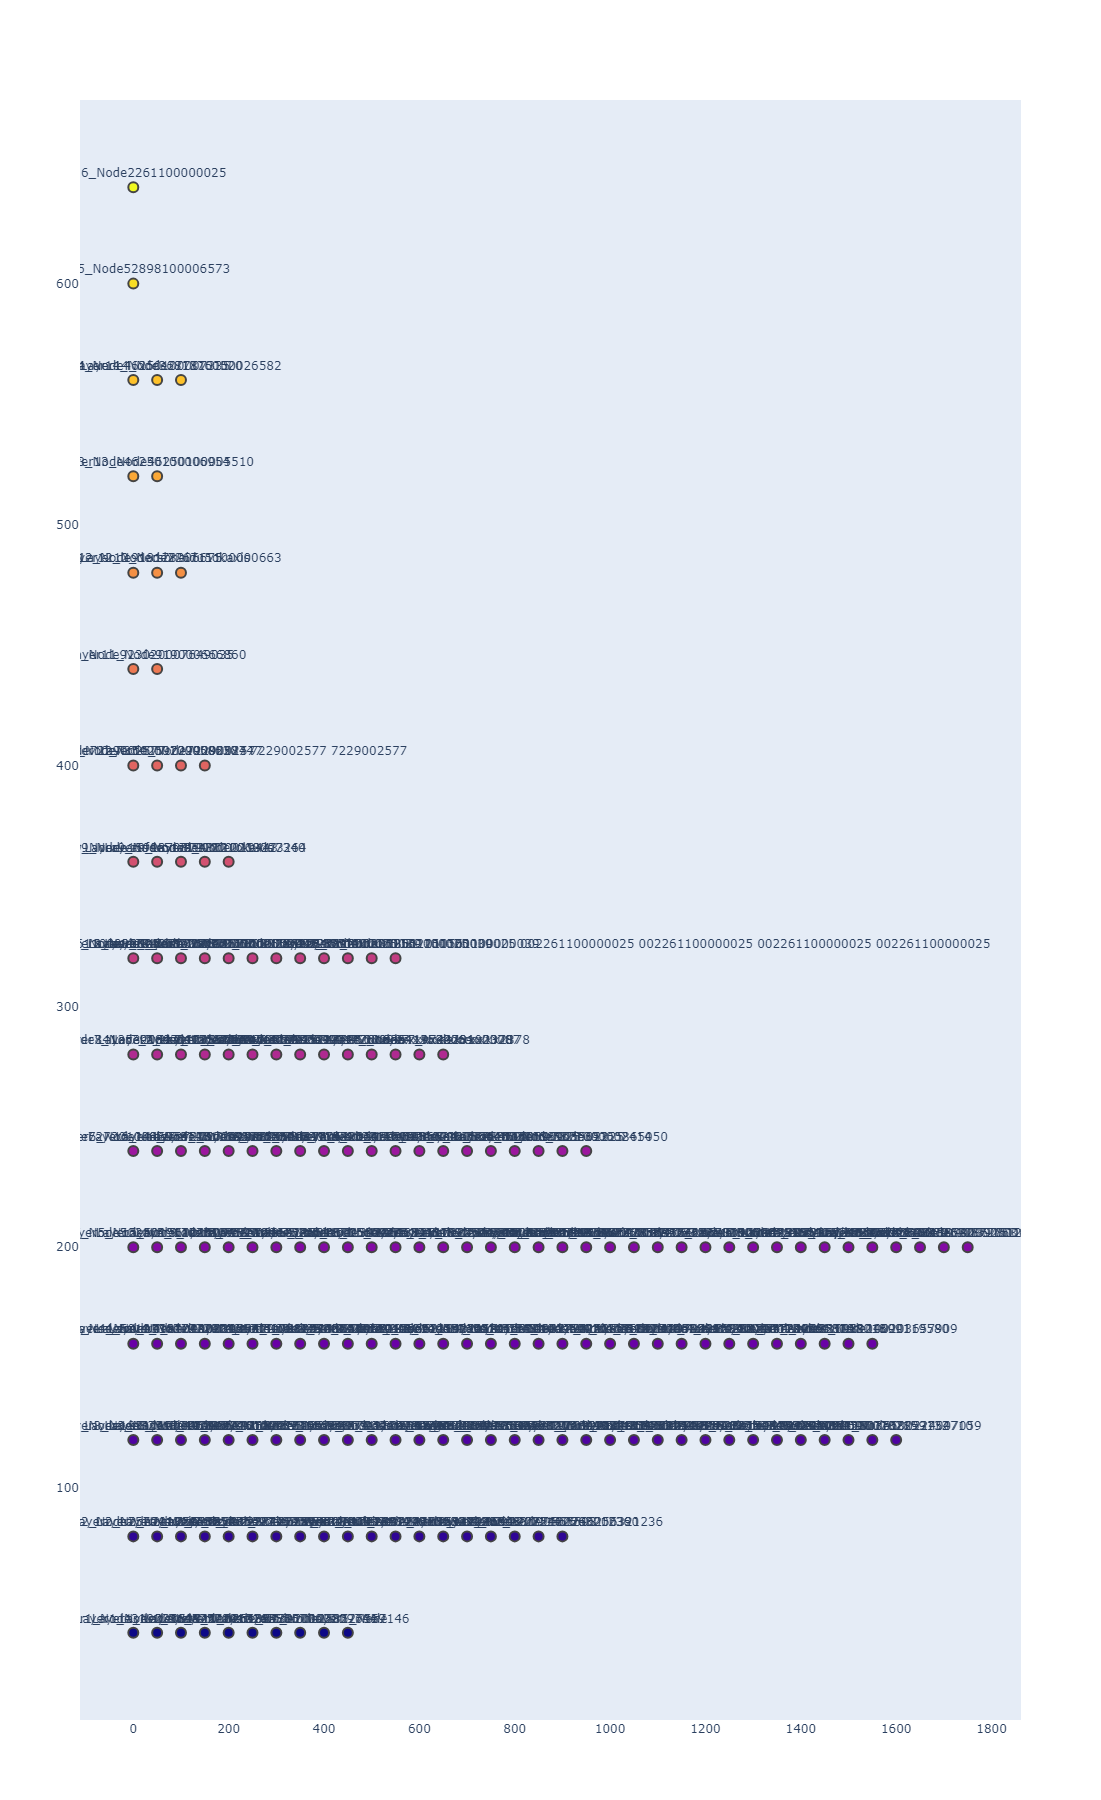

In [101]:
# Assuming df contains your data
layers = df.groupby('layer')

# Create a new NetworkX graph
G = nx.Graph()

# Dictionary to store positions for nodes
positions = {}
layer_gap = 30  # To separate the layers vertically
x_offset = 30   # Offset between nodes in the same layer

# Iterate over each layer and add nodes to the graph
for layer_num, layer_data in layers:
    # Get distinct account numbers
    distinct_accounts = layer_data['from_account_no'].unique()
    
    # Add nodes for each account number in this layer
    for i, account_no in enumerate(distinct_accounts):
        node_id = f'Layer{layer_num}_Node{account_no}'
        G.add_node(node_id, layer=layer_num)
        
        # Set the position of the node
        positions[node_id] = (i * x_offset, layer_num * layer_gap)

# Create Plotly traces for the graph visualization
edge_trace = go.Scatter(
    x=[], y=[], line=dict(width=1, color='#888'),
    hoverinfo='none', mode='lines')

node_trace = go.Scatter(
    x=[], y=[], text=[], mode='markers+text',
    hoverinfo='text', textposition='top center',
    marker=dict(
        showscale=False,
        color=[],
        size=20,
        line_width=2))

# Add nodes to the Plotly trace
for node in G.nodes():
    x, y = positions[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)
    node_trace['marker']['color'] += (G.nodes[node]['layer'],)

# Create the Plotly layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    height = 1200,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

# Create the final figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the plot
fig.show()


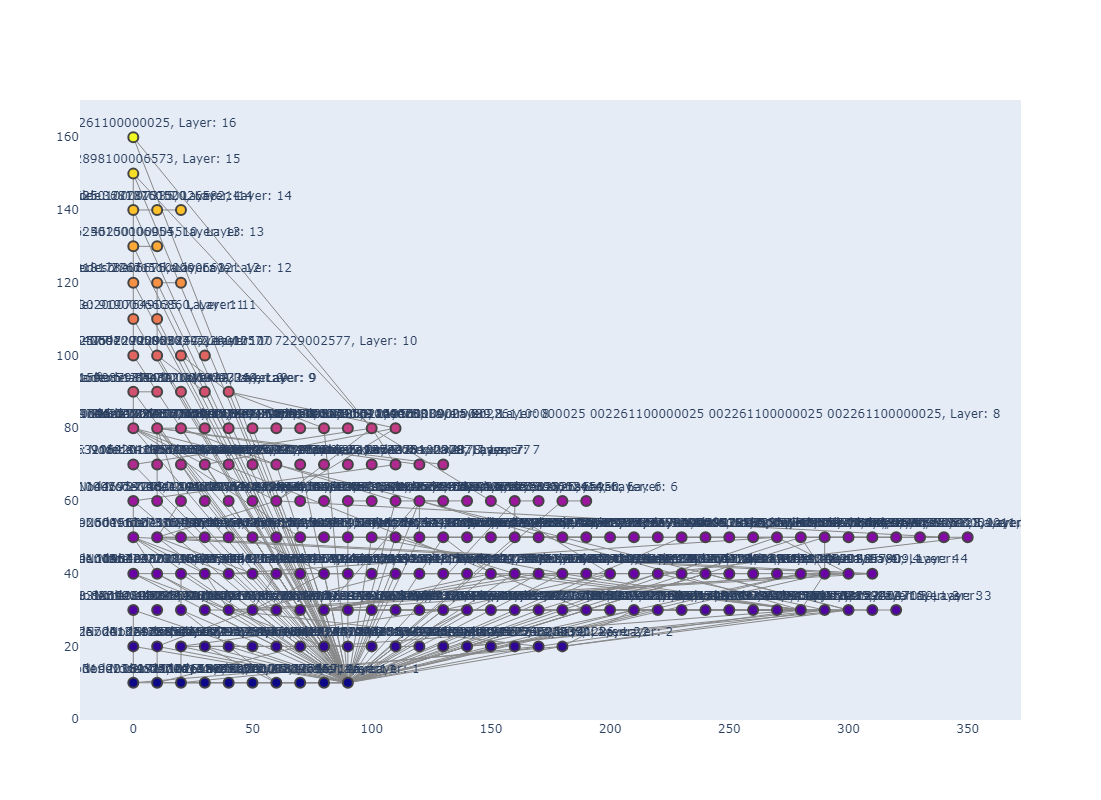

In [67]:
# Assuming df contains your data
layers = df.groupby('layer')

# Create a new NetworkX graph
G = nx.Graph()

# Dictionary to store positions for nodes
positions = {}
layer_gap = 30  # To separate the layers vertically
x_offset = 30   # Offset between nodes in the same layer

# Iterate over each layer and add nodes to the graph
for layer_num, layer_data in layers:
    # Get distinct account numbers
    distinct_accounts = layer_data['from_account_no'].unique()
    
    # Add nodes for each account number in this layer
    for i, account_no in enumerate(distinct_accounts):
        node_id = f'Layer{layer_num}_Node{account_no}'
        G.add_node(node_id, account_no=account_no, layer=layer_num)
        
        # Set the position of the node
        positions[node_id] = (i * x_offset, layer_num * layer_gap)

# Now add edges (connections) between nodes
for idx, row in df.iterrows():
    from_account_no = row['from_account_no']
    to_account_no = row['to_account_no']
    utr_number = row['utr_number']
    
    # Create node IDs for both the from and to accounts
    from_node_id = None
    to_node_id = None
    
    # Find the layer and corresponding node ids for both accounts
    for layer_num, layer_data in layers:
        if from_account_no in layer_data['from_account_no'].values:
            from_node_id = f'Layer{layer_num}_Node{from_account_no}'
        if to_account_no in layer_data['from_account_no'].values:
            to_node_id = f'Layer{layer_num}_Node{to_account_no}'
    
    # If both nodes exist, create an edge between them
    if from_node_id and to_node_id:
        G.add_edge(from_node_id, to_node_id, utr_number=utr_number)

# Create Plotly traces for the graph visualization
edge_trace = go.Scatter(
    x=[], y=[], line=dict(width=1, color='#888'),
    hoverinfo='text', mode='lines')

node_trace = go.Scatter(
    x=[], y=[], text=[], mode='markers+text',
    hoverinfo='text', textposition='top center',
    marker=dict(
        showscale=False,
        color=[],
        size=10,
        line_width=2))

# Add nodes to the Plotly trace
for node in G.nodes():
    x, y = positions[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (f"Node: {G.nodes[node]['account_no']}, Layer: {G.nodes[node]['layer']}",)
    node_trace['marker']['color'] += (G.nodes[node]['layer'],)

# Add edges to the Plotly trace
for edge in G.edges(data=True):
    x0, y0 = positions[edge[0]]
    x1, y1 = positions[edge[1]]
    
    # Ensure hovertext is initialized as a list
    if edge_trace['hovertext'] is None:
        edge_trace['hovertext'] = []

    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)


# Create the Plotly layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    height=800
)

# Create the final figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the plot
fig.show()

In [102]:
# Assuming 'df' is your dataset containing 'from_account_no', 'to_account_no', 'transaction_id', 'utr_number', 'amount', 'layer'

# Initialize directed graph
G = nx.DiGraph()

# Add nodes and edges based on the dataset
for _, row in df.iterrows():
    from_account = row['from_account_no']
    to_account = row['to_account_no']
    layer = row['layer']
    
    # Add nodes (accounts) with their respective layers
    G.add_node(from_account, layer=layer)
    G.add_node(to_account, layer=layer + 1)  # Place 'to_account' in the next layer
    
    # Add edge (transaction) between 'from_account' and 'to_account'
    G.add_edge(from_account, to_account, 
               transaction_id=row['transaction_id'], 
               utr_number=row['utr_number'], 
               amount=row['amount'])

# Generate positions for each layer
positions = {}
layer_gap = 200  # Vertical gap between layers
x_offset = 200   # Horizontal offset between nodes
layer_dict = df.groupby('layer')['from_account_no'].unique()

# Generate positions for nodes in each layer
for layer, accounts in layer_dict.items():
    for i, account in enumerate(accounts):
        positions[account] = (i * x_offset, (max(df['layer']) - layer) * layer_gap)

# Create Plotly traces for nodes and edges
edge_trace = go.Scatter(
    x=[], y=[], line=dict(width=1, color='#888'),
    hoverinfo='text', mode='lines',
    hovertext=(),  # Initialize hovertext as an empty tuple
)

node_trace = go.Scatter(
    x=[], y=[], text=[], mode='markers+text',
    hoverinfo='text', textposition='top center',
    hovertext=(),  # Initialize hovertext as an empty tuple for nodes
    marker=dict(
        showscale=False,
        color=[],  # Node colors for layers
        size=30,
        line_width=2))

# Add edges to the Plotly trace
for edge in G.edges():
    x0, y0 = positions[edge[0]]
    x1, y1 = positions[edge[1]]
    
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)
    
    edge_data = G.edges[edge]
    hover_text = f"Transaction ID: {edge_data['transaction_id']}<br>" \
                 f"UTR Number: {edge_data['utr_number']}<br>" \
                 f"Amount: {edge_data['amount']}"
    
    # Concatenate hover text to the tuple
    edge_trace['hovertext'] += (hover_text,)

# Add nodes to the Plotly trace
for node in G.nodes():
    x, y = positions[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    
    hover_text = f"Account: {node}"
    
    # Concatenate hover text to the tuple for nodes
    node_trace['hovertext'] += (hover_text,)
    
    node_trace['text'] += (node,)
    node_trace['marker']['color'] += (G.nodes[node]['layer'],)

# Create the Plotly layout with a larger height
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    height=800  # Increased height to match the layout
)

# Create the final figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the plot
fig.show()

KeyError: 'Reported'

In [78]:
len(df['utr_number'].unique())

187

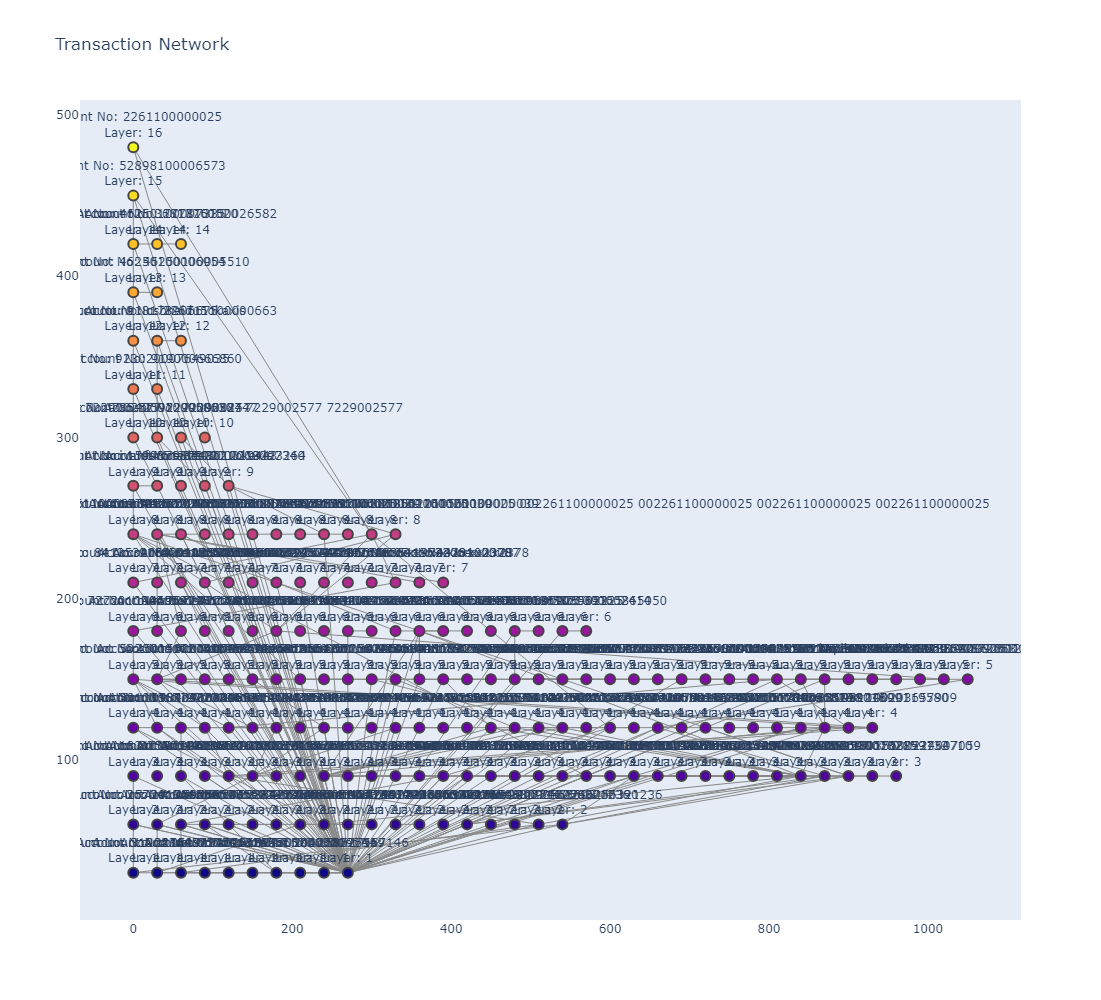

In [108]:
import plotly.graph_objects as go
import networkx as nx

# Assuming df contains your data
layers = df.groupby('layer')

# Create a new NetworkX graph
G = nx.DiGraph()  # Use a directed graph to show transaction flow

# Dictionary to store positions for nodes
positions = {}
layer_gap = 30  # To separate the layers vertically
x_offset = 30   # Offset between nodes in the same layer

# Iterate over each layer and add nodes to the graph
for layer_num, layer_data in layers:
    # Get distinct account numbers
    distinct_accounts = layer_data['from_account_no'].unique()
    
    # Add nodes for each account number in this layer
    for i, account_no in enumerate(distinct_accounts):
        node_id = f'Layer{layer_num}_Node{account_no}'
        G.add_node(node_id, account_no=account_no, layer=layer_num)
        
        # Set the position of the node
        positions[node_id] = (i * x_offset, layer_num * layer_gap)

# Now add edges (connections) between nodes
for idx, row in df.iterrows():
    from_account_no = row['from_account_no']
    to_account_no = row['to_account_no']
    utr_number = row['utr_number']
    amount = row['amount']  # Assuming 'amount' is a column in your DataFrame
    
    # Create node IDs for both the from and to accounts
    from_node_id = None
    to_node_id = None
    
    # Find the layer and corresponding node ids for both accounts
    for layer_num, layer_data in layers:
        if from_account_no in layer_data['from_account_no'].values:
            from_node_id = f'Layer{layer_num}_Node{from_account_no}'
        if to_account_no in layer_data['from_account_no'].values:
            to_node_id = f'Layer{layer_num}_Node{to_account_no}'
    
    # If both nodes exist, create an edge between them
    if from_node_id and to_node_id:
        G.add_edge(from_node_id, to_node_id, utr_number=utr_number, amount=amount,
                   from_account_no=from_account_no, to_account_no=to_account_no)

# Create Plotly traces for the graph visualization
edge_trace = go.Scatter(
    x=[], y=[],  # Initialize x and y for edges
    line=dict(width=1, color='#888'),
    hoverinfo='none', mode='lines')  # Disable hoverinfo for edges

node_trace = go.Scatter(
    x=[], y=[], text=[], mode='markers+text',
    hoverinfo='text', textposition='top center',
    marker=dict(
        showscale=False,
        color=[],
        size=10,
        line_width=2))

# Add nodes to the Plotly trace
for node in G.nodes():
    x, y = positions[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    # Display node text in line by line
    node_trace['text'] += (f"Account No: {G.nodes[node]['account_no']}<br>Layer: {G.nodes[node]['layer']}",)
    node_trace['marker']['color'] += (G.nodes[node]['layer'],)

# Add edges to the Plotly trace
for edge in G.edges(data=True):
    x0, y0 = positions[edge[0]]
    x1, y1 = positions[edge[1]]
    
    # Add edge information for hover (if needed, you can include this)
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create the Plotly layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    height=1000,
    title='Transaction Network'
)

# Create the final figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the plot
fig.show()